<a href="https://colab.research.google.com/github/ElizaLo/ML-using-Jupiter-Notebook-and-Google-Colab/blob/master/Quora%20Insincere%20Questions%20Classification%20/%20Quora_Insincere_Questions_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quora Insincere Questions Classification

**Detect toxic content to improve online conversations**

In [0]:
from google.colab import files
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 
import os
import sys

tf.logging.set_verbosity(tf.logging.ERROR) # Устанавливает порог для того, какие сообщения будут регистрироваться.

In [12]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
os.chdir("/content/gdrive/My Drive/Quora Insincere Questions Classification")

In [0]:
train = pd.read_csv("train.csv", encoding = 'latin-1')
test = pd.read_csv("test.csv", encoding = 'latin-1')

In [16]:
train.head(15)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
5,00004f9a462a357c33be,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0
6,00005059a06ee19e11ad,Why does Quora automatically ban conservative ...,0
7,0000559f875832745e2e,Is it crazy if I wash or wipe my groceries off...,0
8,00005bd3426b2d0c8305,"Is there such a thing as dressing moderately, ...",0
9,00006e6928c5df60eacb,Is it just me or have you ever been in this ph...,0


In [21]:
test.head(15)

,qid,question_text
0,00014894849d00ba98a9,My voice range is A2-C5. My chest voice goes u...
1,000156468431f09b3cae,How much does a tutor earn in Bangalore?
2,000227734433360e1aae,What are the best made pocket knives under $20...
3,0005e06fbe3045bd2a92,Why would they add a hypothetical scenario tha...
4,00068a0f7f41f50fc399,What is the dresscode for Techmahindra freshers?
5,000a2d30e3ffd70c070d,How well are you adapting to the Trump era?
6,000b67672ec9622ff761,What should be the last thing people do in life?
7,000b7fb1146d712c1105,Received conditional offer for Masters in Inte...
8,000d665a8ddc426a1907,What does appareils photo mean in French?
9,000df6fd2229447b2969,Is there a system of Public Interest Litigatio...


In [40]:
print("Train shape: ",train.shape)
print("Test shape: ",test.shape)

Train shape:  (1306122, 3)
Test shape:  (56370, 2)


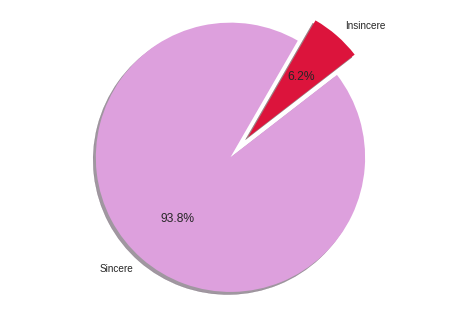

In [39]:
count_Class = pd.value_counts(train.target, sort = True)

# Data to Plot
target = 'Sincere', 'Insincere'
sizes = [count_Class[0], count_Class[1]]
colors = ['plum', 'crimson']
explode = (0.1, 0.1)

# Plot
plt.pie(sizes, explode = explode, labels = target, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 60)
plt.axis('equal')
plt.show()

In [0]:
# Делим - 1) набір для тренування (60%) 2) набір для оцінки (20%) 3) набір ратифікації (20%)

"""def split_data(data):
  training = []
  evaluation = []
  validation = []
  for (index, row) in enumerate(data.values):
    ind = index % 10
    if ind < 6:
      training.append(row)
    elif ind < 8:
      evaluation.append(row)
    else:
      validation.append(row)
  return (pd.DataFrame(training, columns=data.columns), 
          pd.DataFrame(evaluation, columns=data.columns), 
          pd.DataFrame(validation, columns=data.columns))
      
training_data, evaluation_data, validation_data = split_data(exams)
"""